# Multi-Model Classification

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    MLPClassifier(max_iter=1000),  # Increase max_iter for larger datasets
]


/Users/vineethsai/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results in the DataFrame
    results.loc[len(results)] = [model.__class__.__name__, accuracy, precision, recall, f1]

# Print the results
print(results)

                        Model  Accuracy  Precision  Recall  F1 Score
0          LogisticRegression       1.0        1.0     1.0       1.0
1      DecisionTreeClassifier       1.0        1.0     1.0       1.0
2      RandomForestClassifier       1.0        1.0     1.0       1.0
3                         SVC       1.0        1.0     1.0       1.0
4        KNeighborsClassifier       1.0        1.0     1.0       1.0
5                  GaussianNB       1.0        1.0     1.0       1.0
6  GradientBoostingClassifier       1.0        1.0     1.0       1.0
7               MLPClassifier       1.0        1.0     1.0       1.0


# Visualizations

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

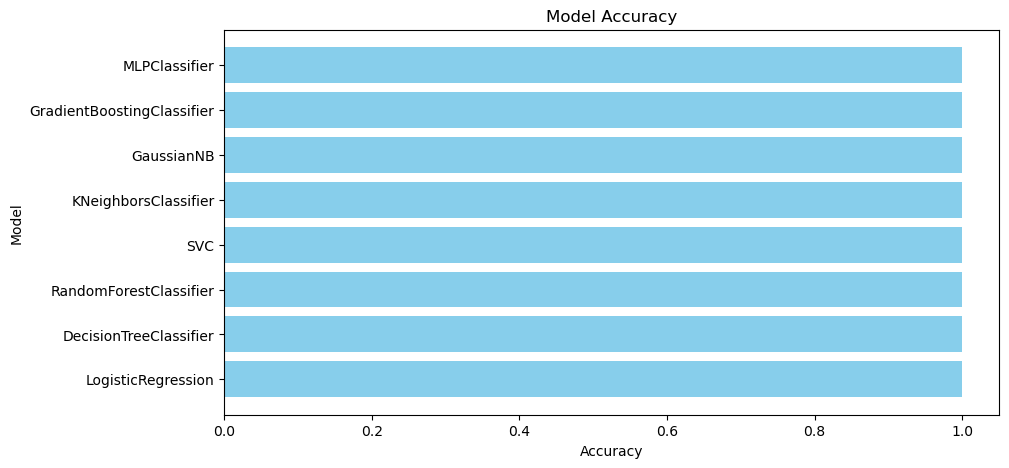

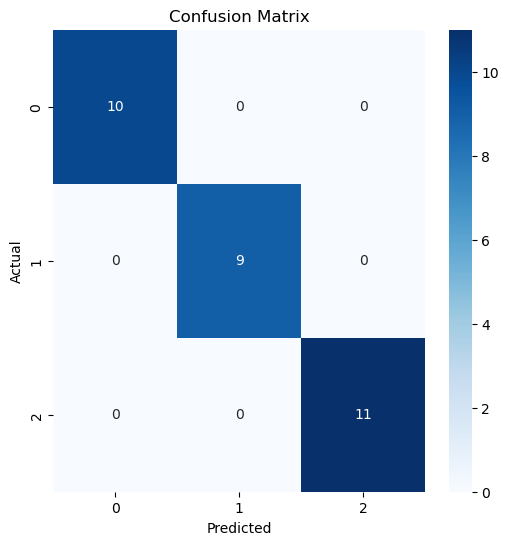

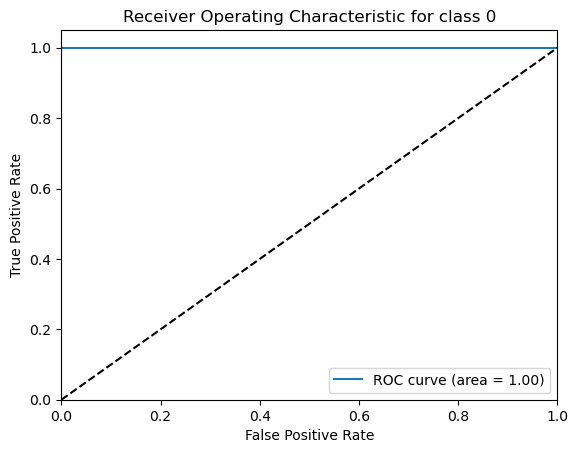

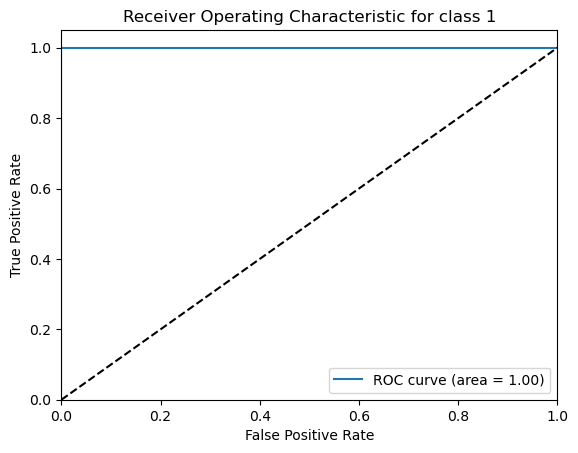

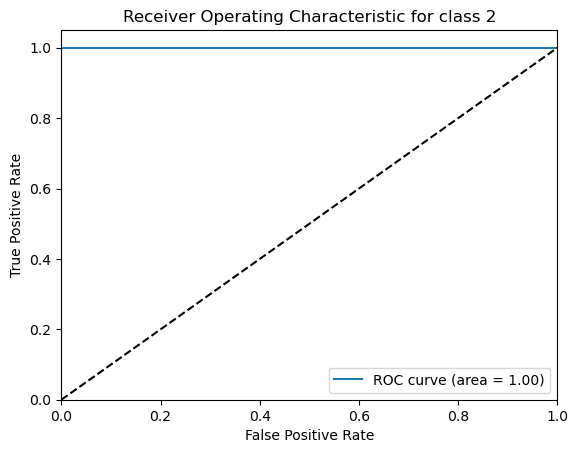

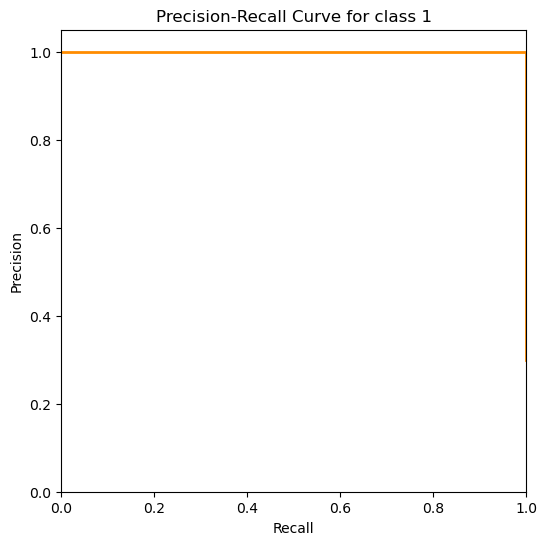

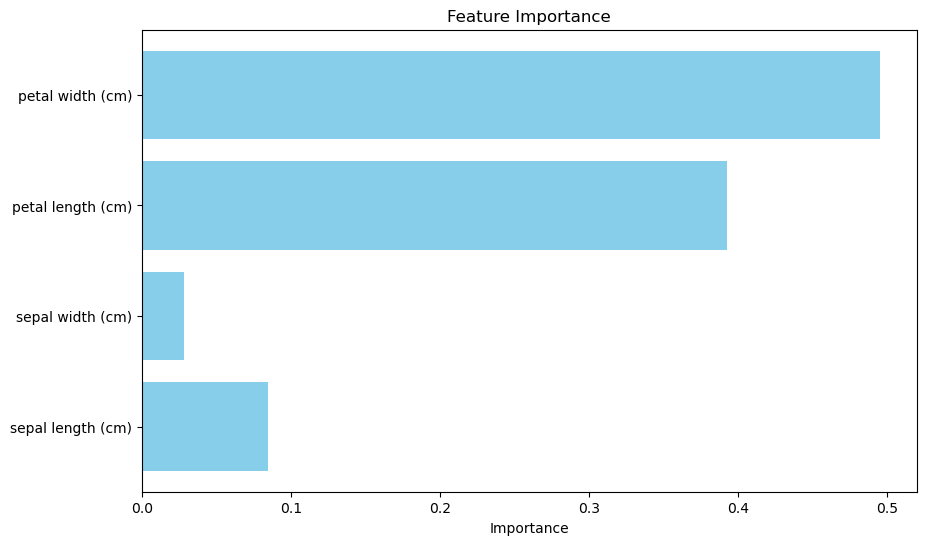

In [4]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Generate a bar plot
plt.barh(results['Model'], results['Accuracy'], color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy')

# Show the plot
plt.show()

# Select a model for demonstration (e.g., the first one)
model = models[0]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve
# Note: Precision-Recall does not directly support multiclass. Here we choose class 1 as positive and rest as negative.
precision, recall, _ = precision_recall_curve(y_test_bin[:, 1], y_proba[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for class 1')
plt.show()

# Feature Importance (only for models that have feature_importances_ attribute, e.g., RandomForestClassifier)
if hasattr(models[2], 'feature_importances_'):
    model = models[2]
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(iris.feature_names, importance, color='skyblue')  # Corrected line
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.show()